In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import time

import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull, distance
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_bank_orig_tns = pd.read_csv('../dataframes/dataset_bank_orig_tns.csv', index_col=0)
dataset_bank_orig_tns = dataset_bank_orig_tns[~dataset_bank_orig_tns.isnull().any(axis=1)]
dataset_bank_orig_tns

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR,has_tns,tns_cls,spec_z,report_group
ztf_object_id,,,,,,,,,,,,,,,,,,,,,
ZTF17aaazdba,1.959600,0.606419,0.250000,0.223607,0.419184,3.903300,3.114700,2.077589,-0.496847,0.006728,...,0.903500,0.869101,0.996100,1.008201,127.853676,0.008673,Yes_TNS,TDE,0.022000,ASAS-SN
ZTF18aaacqmh,0.086600,-0.029693,0.236111,0.235702,0.178279,0.133907,0.071662,0.030107,1.215970,-0.000038,...,1.603500,1.639200,1.585000,1.811999,153.608877,0.438945,Yes_TNS,SN Ia,0.018000,ASAS-SN
ZTF18aabeszt,0.863825,-0.432979,0.352941,0.242536,0.402415,1.727650,1.124861,0.719469,0.015570,0.011897,...,1.377100,1.417500,1.326600,1.264300,13.694428,0.155972,Yes_TNS,SN Ia,0.081000,ALeRCE
ZTF18aacnlxz,0.301177,-0.515176,0.400000,0.000000,0.394944,0.602354,0.524916,0.248890,-0.368786,0.021498,...,0.000801,-0.006701,-0.005301,0.105499,140.931455,0.172488,Yes_TNS,SN II,0.072475,ZTF
ZTF18aadlaxo,0.400349,-0.333744,0.111111,0.333333,0.379893,0.800697,0.648489,0.327314,1.091979,0.019788,...,0.774100,0.759600,0.756000,0.753699,62.022695,0.036486,Yes_TNS,SN Ia,0.052953,ZTF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF21acipbwd,0.226666,-0.522588,0.200000,0.000000,0.423364,0.453333,0.453333,0.351079,-1.565131,0.045277,...,1.008301,1.133600,1.119000,0.908300,118.102174,1.126838,Yes_TNS,SN Ia,0.094000,YSE
ZTF21aciuhqw,0.670816,0.405011,0.150000,0.223607,0.349629,1.341633,0.783248,0.277588,2.184644,0.012107,...,0.897000,0.937399,0.836400,0.902900,67.693626,1.141200,Yes_TNS,SN Ic-BL,0.045000,ZTF
ZTF21ackbbfs,0.697504,-0.062708,0.312500,0.000000,0.437075,1.395008,1.114128,0.791843,-1.046044,-0.034734,...,0.527599,0.537399,0.562101,0.208200,27.792938,0.595682,Yes_TNS,SN Ia,0.045000,AMPEL


In [3]:
Counter(dataset_bank_orig_tns.tns_cls)

Counter({'TDE': 9,
         'SN Ia': 731,
         'SN II': 161,
         'SN Ia-pec': 6,
         'AGN': 5,
         'SN Ia-91T-like': 25,
         'SN': 3,
         'SN Ib': 17,
         'SLSN-II': 7,
         'SN IIn': 29,
         'SN Ic-BL': 9,
         'SN Ia-91bg-like': 6,
         'SN Ic': 16,
         'CV': 2,
         'SN Ia-CSM': 3,
         'SN IIP': 9,
         'SN Iax[02cx-like]': 3,
         'SN IIb': 15,
         'Nova': 1,
         'SLSN-I': 5,
         'Other': 4,
         'SN Ib-pec': 2,
         'SN I': 5,
         'SN II-pec': 2,
         'SN Ib/c': 3,
         'SN Ibn': 4,
         'SN Icn': 1})

In [4]:
# group the rows by label and count the occurrences
counts = dataset_bank_orig_tns.groupby("tns_cls").size()

# select only the labels with more than 3 occurrences
labels_to_keep = counts[counts > 10].index.tolist()

# filter the dataframe to keep only the selected labels
dataset_bank_orig_tns = dataset_bank_orig_tns[dataset_bank_orig_tns["tns_cls"].isin(labels_to_keep)]
dataset_bank_orig_tns

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR,has_tns,tns_cls,spec_z,report_group
ztf_object_id,,,,,,,,,,,,,,,,,,,,,
ZTF18aaacqmh,0.086600,-0.029693,0.236111,0.235702,0.178279,0.133907,0.071662,0.030107,1.215970,-0.000038,...,1.603500,1.639200,1.585000,1.811999,153.608877,0.438945,Yes_TNS,SN Ia,0.018000,ASAS-SN
ZTF18aabeszt,0.863825,-0.432979,0.352941,0.242536,0.402415,1.727650,1.124861,0.719469,0.015570,0.011897,...,1.377100,1.417500,1.326600,1.264300,13.694428,0.155972,Yes_TNS,SN Ia,0.081000,ALeRCE
ZTF18aacnlxz,0.301177,-0.515176,0.400000,0.000000,0.394944,0.602354,0.524916,0.248890,-0.368786,0.021498,...,0.000801,-0.006701,-0.005301,0.105499,140.931455,0.172488,Yes_TNS,SN II,0.072475,ZTF
ZTF18aadlaxo,0.400349,-0.333744,0.111111,0.333333,0.379893,0.800697,0.648489,0.327314,1.091979,0.019788,...,0.774100,0.759600,0.756000,0.753699,62.022695,0.036486,Yes_TNS,SN Ia,0.052953,ZTF
ZTF18aadsuxd,1.571259,-0.029672,0.405405,0.164399,0.404993,2.956993,2.070268,1.237474,0.041943,0.028573,...,0.391500,0.493999,0.476999,0.490301,7.703572,0.052800,Yes_TNS,SN II,0.030570,ZTF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF21achducl,0.471145,0.222645,0.150000,0.223607,0.365980,0.942289,0.528921,0.207972,2.038940,-0.008163,...,0.727201,0.651400,0.684500,0.565001,45.849606,0.599846,Yes_TNS,SN IIn,0.069000,ZTF
ZTF21acipbwd,0.226666,-0.522588,0.200000,0.000000,0.423364,0.453333,0.453333,0.351079,-1.565131,0.045277,...,1.008301,1.133600,1.119000,0.908300,118.102174,1.126838,Yes_TNS,SN Ia,0.094000,YSE
ZTF21ackbbfs,0.697504,-0.062708,0.312500,0.000000,0.437075,1.395008,1.114128,0.791843,-1.046044,-0.034734,...,0.527599,0.537399,0.562101,0.208200,27.792938,0.595682,Yes_TNS,SN Ia,0.045000,AMPEL


In [5]:
Counter(dataset_bank_orig_tns.tns_cls)

Counter({'SN Ia': 731,
         'SN II': 161,
         'SN Ia-91T-like': 25,
         'SN Ib': 17,
         'SN IIn': 29,
         'SN Ic': 16,
         'SN IIb': 15})

[0.23086057 0.39419203]
[[ 1.17117041 -0.4922544 ]]


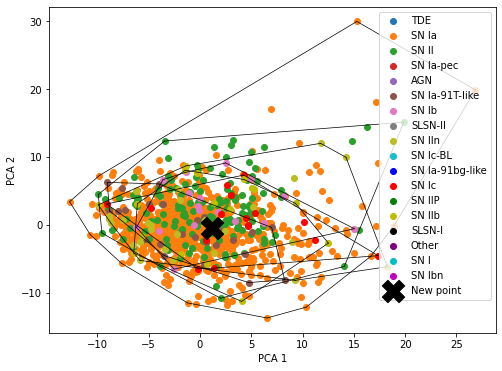

[[  0.96470001  -0.26335128 -15.18694028]
 [  0.36127399  -0.9324597  -10.79993463]
 [ -0.77220129   0.63537797 -10.49224231]
 [ -0.11824888   0.99298399 -12.65679092]
 [ -0.99804085  -0.06256561  -9.6139283 ]
 [ -0.62031932  -0.78434938  -7.22003764]
 [ -0.65588793  -0.75485828  -7.17783232]]
[-13.92747635  -9.91781383 -11.70938921 -13.28408125 -10.75200601
  -7.56043783  -7.57440654]
[0. 0. 0. 0. 0. 0. 0.]
[[ -0.56083364  -0.82792851  -7.06577208]
 [  0.71198146  -0.70219826 -10.80969384]
 [ -0.99884545   0.04803931  -6.24376686]
 [ -0.72483801   0.68891934  -6.5700792 ]
 [  0.8773459    0.47985849  -9.69012125]
 [  0.22950052   0.97330854  -7.48424836]
 [  0.57360528   0.81913185  -7.93074411]]
[-7.31505239 -9.63018203 -7.43723265 -7.75811161 -8.89881215 -7.69457955
 -7.66217584]
[0. 0. 0. 0. 0. 0. 0.]
[[ -0.55808786   0.82978187  -7.9676688 ]
 [ -0.24519831   0.96947294  -8.74535879]
 [  0.97013949   0.24254766 -16.22389256]
 [  0.63926375   0.76898756 -16.74330824]
 [ -0.90998117 

In [7]:
%%time

# Toy data with 3 distinct classes
X = np.array(dataset_bank_orig_tns.iloc[:, :-4])
y = np.array(dataset_bank_orig_tns.tns_cls.iloc[:])


# PCA to reduce the dimensionality to 2
scaler = preprocessing.StandardScaler() # Create a scalar

# pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X)

pca = PCA(n_components=2)
feat_arr_scaled = scaler.fit_transform(X)
X_pca = np.array(pca.fit_transform(feat_arr_scaled))
# Print the explained variance
print(np.cumsum(pca.explained_variance_ratio_))


# #What i normally use
# #OR try scalar then PCA
# print("pca")
# # Initialize PCA with 25 principal components
# n_components=35
# pca = PCA(n_components=n_components)
# feat_arr_scaled = scaler.fit_transform(feat_arr)
# feat_arr_scaled = np.array(pca.fit_transform(feat_arr_scaled))
# # Print the explained variance
# print(np.cumsum(pca.explained_variance_ratio_))

X_cls = np.array(dataset_bank_orig_tns.iloc[:, -3])

fig, ax = plt.subplots(figsize=(8,6))

# Convex hulls for each class
hulls = {}
for label in np.unique(y):
    points = X_pca[y == label]
    hull = ConvexHull(points, qhull_options="QJ")
    hulls[label] = hull
    
    # plot convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=0.7)

# New object to be classified
# new_obj = np.array(dataset_bank_orig_tns.iloc[140, :-4])
# new_obj_pca = pca.transform(new_obj.reshape(1, -1))
#print(pca.fit_transform(np.array(dataset_bank_orig_tns.iloc[140, :-4]).reshape(1, -1)))
new_obj = np.array(dataset_bank_orig_tns.iloc[143, :-4]).reshape(1, -1)
new_obj_pca = pca.transform(scaler.transform(new_obj))
print(new_obj_pca)


# Define color map for class labels
color_map = {'TDE': "C0",
         'SN Ia': "C1",
         'SN II': "C2",
         'SN Ia-pec': "C3",
         'AGN': "C4",
         'SN Ia-91T-like': "C5",
         'SN Ib': "C6",
         'SLSN-II': "C7",
         'SN IIn': "C8",
         'SN Ic-BL': "C9",
         'SN Ia-91bg-like': "blue",
         'SN Ic':"r",
         'SN IIP': "g",
         'SN IIb': "y",
         'SLSN-I': "k",
         'Other': "purple",
         'SN I': "c",
         'SN Ibn': "m"}
colors = [color_map[label] for label in y]
# Plot data
for cls, colr in color_map.items():
    # Retrieve indices where label is "SN"
    sn_indices = np.where(X_cls == cls)[0]
    ax.scatter(X_pca[sn_indices, 0], X_pca[sn_indices, 1], c=colr, label=cls)

ax.scatter(new_obj_pca[:, 0], new_obj_pca[:, 1], marker="X", c="k", s=500, label='New point')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Calculate distances to each class
distances = {}
for label, hull in hulls.items():
    points = X_pca[y == label]

    # calc manhattan distance
    print(hull.equations)
    dist = distance.cityblock((hull.equations[:, :-1].dot(new_obj_pca.T).flatten() + hull.equations[:, -1]).flatten(),
                              np.zeros(len(hull.equations[:, -1]),))
    print((hull.equations[:, :-1].dot(new_obj_pca.T).flatten() + hull.equations[:, -1]).flatten())
    print(np.zeros(len(hull.equations[:, -1])))
    distances[label] = dist

print(distances)


In [7]:
print(dataset_bank_orig_tns.iloc[143].name, dataset_bank_orig_tns.iloc[143, -3])
print(f'https://alerce.online/object/{dataset_bank_orig_tns.iloc[143].name}')

ZTF20acfaonm SN Ia
https://alerce.online/object/ZTF20acfaonm


In [8]:
print(dataset_bank_orig_tns.iloc[143])

feature_amplitude_magn_r                  0.778013
feature_anderson_darling_normal_magn_r   -0.294511
feature_beyond_1_std_magn_r               0.368421
feature_beyond_2_std_magn_r               0.229416
feature_cusum_magn_r                       0.40701
                                            ...   
dist/DLR                                   0.82536
has_tns                                    Yes_TNS
tns_cls                                      SN Ia
spec_z                                     0.07363
report_group                                ALeRCE
Name: ZTF20acfaonm, Length: 124, dtype: object


In [35]:
print(pca.transform(np.array(dataset_bank_orig_tns.iloc[143, :-4]).reshape(1, -1)))

[[ 25.89590123  19.3744845  -37.50769913 -15.17657884]]


In [40]:
pca.transform(scaler.transform(new_obj))

array([[ 1.17117041, -0.49225441, -4.13013709, -2.46604332]])

In [42]:
pca.transform(new_obj)

array([[ 25.89590123,  19.3744845 , -37.50769913, -15.17657884]])

In [38]:
scaler.transform(new_obj)

array([[ 7.13247980e-04, -2.47442369e-01,  3.32170101e-01,
         1.07780910e+00,  2.51740712e-01,  1.50727463e-02,
        -1.21061792e-01, -7.52400528e-02,  9.11716819e-02,
         6.70708308e-01,  1.69982191e-01,  4.40471046e-01,
        -4.85409046e-01,  7.46549998e-01, -8.77854275e-02,
        -5.40565917e-02, -1.03808092e+00, -4.87846057e-01,
         2.16812791e-01,  9.54579282e-02,  3.00088239e-01,
        -1.43931017e-01,  7.88165171e-01,  7.56385774e-01,
        -2.34715414e-01,  7.11049639e-01,  6.80790162e-02,
        -5.57269187e-01,  1.10126233e-01, -3.18287780e-02,
        -4.18028591e-02,  1.41611462e-02,  4.11148090e-03,
         2.66465604e-01, -6.01650112e-01,  9.54199715e-01,
         2.29378734e-02, -9.37863436e-02, -8.36576632e-02,
        -7.64723747e-01,  1.05204197e+00,  2.49638702e-01,
         1.79893680e+00,  8.63110277e-02,  1.03765772e+00,
         3.29908190e-01, -1.17817574e-01, -8.26947679e-01,
        -1.44985460e-01,  1.79247747e-01,  9.68545306e-0

In [39]:
new_obj

array([[0.7780132293701172, -0.2945114025961255, 0.3684210526315789,
        0.2294157338705617, 0.4070101815075507, 1.5560264587402344,
        1.175167635753496, 0.7059259414672852, -0.1013808053821519,
        0.0275039214972882, -2.65007516887075, 0.2435039010482891,
        0.5513426371290726, 19.29640227869937, 0.3121261596679687,
        1.015275955200195, 0.0526315789473684, 0.2105263157894736,
        -1.1188677439242725, -1.215049669220799, 0.6325550516777312,
        0.454395287012903, 0.89653869401878, 19.14484783732955,
        -0.3177671791424127, 0.4298634363413301, 0.5005162832555717,
        -1.006372848954041, -0.4300056814126853, 0.0072395467290245,
        0.8379684340866741, 0.9400014877319336, -0.2164701643002476,
        0.3571428571428571, 0.0, 0.4370528581978588, 1.8800029754638672,
        1.517931237335688, 0.939472198486328, -1.1093212425623338,
        0.0489909650964401, -2.4053152601206755, 0.4131847103839868,
        0.6664577764688996, 19.70004068102155

In [ ]:
dataset_bank_orig_tns = pd.read_csv('../dataframes/dataset_bank_orig_tns.csv', index_col=0)
dataset_bank_orig_tns = dataset_bank_orig_tns[~dataset_bank_orig_tns.isnull().any(axis=1)]
dataset_bank_orig_tns

In [121]:
X = np.array(dataset_bank_orig_tns.iloc[130:139, :-4])
X

array([[ 1.22590351e+00,  1.28950163e-01,  1.92307692e-01, ...,
         5.84099770e-01,  1.00422999e+02,  5.31159537e-01],
       [ 1.59992695e+00, -4.94027861e-01,  3.66666667e-01, ...,
         2.20000267e-01,  1.04192850e+02,  3.87628080e+00],
       [ 1.03472042e+00,  1.10516867e-01,  3.57142857e-01, ...,
         4.07098770e-01,  4.67392372e+01,  3.42298560e-01],
       ...,
       [ 5.68502426e-01,  4.23403156e-02,  4.00000000e-01, ...,
        -3.60012054e-02,  3.65176995e+00,  3.39923006e-01],
       [ 8.55412483e-01,  1.38404795e-01,  2.17391304e-01, ...,
         1.38401031e-01,  1.90291125e+01,  1.48950555e+00],
       [ 1.23272610e+00, -1.19486367e-01,  4.40000000e-01, ...,
         4.22700882e-01,  9.00471685e+00,  6.18179358e-01]])

In [133]:
X_cls = np.array(dataset_bank_orig_tns.iloc[130:139, -3])
X_cls

array(['SN Ia', 'SN Ia', 'SN Ia', 'SN Ia', 'SN II', 'SN Ia', 'SN II',
       'SN II', 'SN Ia'], dtype=object)

In [135]:
# Retrieve indices where label is "SN"
sn_indices = np.where(X_cls == "SN Ia")[0]
sn_indices

array([0, 1, 2, 3, 5, 8])

In [139]:
X_pca[sn_indices, 0]

array([ 56.09630186,  75.16272217,   9.47247975, -17.22205659,
       -34.144315  , -29.44996778])

In [122]:
y = np.array(dataset_bank_orig_tns.tns_cls.iloc[130:139])
y

array(['SN Ia', 'SN Ia', 'SN Ia', 'SN Ia', 'SN II', 'SN Ia', 'SN II',
       'SN II', 'SN Ia'], dtype=object)

In [123]:
np.unique(y)

array(['SN II', 'SN Ia'], dtype=object)

In [124]:
np.shape(X)

(9, 120)

In [125]:
np.shape(y)

(9,)

In [126]:
np.array(dataset_bank_orig_tns.iloc[140, :-4])

array([1.5485143661499023, 0.1305130704369, 0.4418604651162791, 0.0,
       0.4349855035782141, 3.0672331004165017, 2.642013169332131,
       1.8744940757751465, -1.037035404684277, 0.0312197890577708,
       -3.3607860885791623, 0.2018440584518865, 0.7027686504778164,
       17.965396481891013, 0.8065357208251953, 2.107919692993164,
       0.0930232558139534, 0.2093023255813953, -0.7795460513664256,
       -0.8260672281421422, 0.391079576815656, 1.001842408277265,
       0.8899600926643224, 17.348255440094874, 0.207459908990021,
       0.4342456507835703, 0.7975942340062173, -1.113678976016569,
       -0.1444447895384712, 0.3557079348648216, 0.8845348457831469,
       1.626546859741211, 0.3994863298164605, 0.3421052631578947, 0.0,
       0.4388063553536445, 3.251771629761606, 3.077940434368429,
       2.299396514892578, -1.0842523941622146, 0.0368293580328854,
       -3.0720704614350667, 0.2495215805769293, 0.8381852416162611,
       18.14991599635074, 0.7204322814941406, 0.0526315789

In [127]:
np.array(dataset_bank_orig_tns.tns_cls.iloc[140])

array('SN Ia', dtype='<U5')

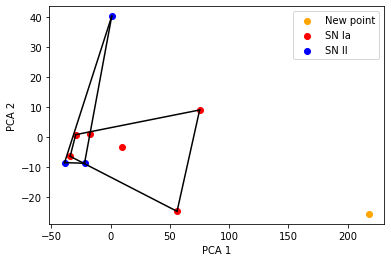

{'SN II': 307.62792101621324, 'SN Ia': 268.91996599499606}


In [156]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull, distance

# Toy data with 3 distinct classes
X = X
y = y

# PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


fig, ax = plt.subplots()

# Convex hulls for each class
hulls = {}
for label in np.unique(y):
    points = X_pca[y == label]
    hull = ConvexHull(points, qhull_options="QJ")
    hulls[label] = hull
    
    # plot convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], 'k-')

# New object to be classified
new_obj = np.array(dataset_bank_orig_tns.iloc[140, :-4])
new_obj_pca = pca.transform(new_obj.reshape(1, -1))

# Define color map for class labels
color_map = {'SN Ia': 'red', 'SN II': 'blue'}
colors = [color_map[label] for label in y]
# Plot data
ax.scatter(new_obj_pca[:, 0], new_obj_pca[:, 1], c="orange", label='New point')
for cls, colr in color_map.items():
    # Retrieve indices where label is "SN"
    sn_indices = np.where(X_cls == cls)[0]
    ax.scatter(X_pca[sn_indices, 0], X_pca[sn_indices, 1], c=colr, label=cls)


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Calculate distances to each class
distances = {}
for label, hull in hulls.items():
    points = X_pca[y == label]
    new_obj_pca = pca.transform(new_obj.reshape(1, -1))

    dist = distance.minkowski((hull.equations[:, :-1].dot(new_obj_pca.T).flatten() + hull.equations[:, -1]).flatten(),
                              np.zeros(len(hull.equations[:, -1]),), p=2)
    distances[label] = dist

# Concatenate distances from all classes into a single array
#all_distances = np.concatenate(list(distances.values()))
print(distances)




In [154]:
print(f'https://alerce.online/object/{dataset_bank_orig_tns.iloc[140].name}')

https://alerce.online/object/ZTF20abyyfmw


In [93]:
import numpy as np
from scipy.spatial import ConvexHull, distance

# Generate toy dataset
np.random.seed(123)
n_points = 1000
points = np.concatenate([
    np.random.normal(loc=[-1,-1], size=(n_points//2,2)),
    np.random.normal(loc=[1,1], size=(n_points//2,2))
])
labels = np.concatenate([
    np.zeros(n_points//2),
    np.ones(n_points//2)
])

# Calculate convex hull for each label
unique_labels = np.unique(labels)
hulls = {}
for label in unique_labels:
    indices = np.where(labels == label)[0]
    hull = ConvexHull(points[indices])
    hulls[label] = hull

# Calculate distance from each point to its label's convex hull
distances = np.zeros(n_points)
for label in unique_labels:
    indices = np.where(labels == label)[0]
    hull = hulls[label]
    distances[indices] = distance.cdist(points[indices], points[hull.vertices]).min(axis=1)

# Print results
for label in unique_labels:
    indices = np.where(labels == label)[0]
    print(f"Label {label}: min distance = {distances[indices].min()}, max distance = {distances[indices].max()}")


Label 0.0: min distance = 0.0, max distance = 2.8344482810570146
Label 1.0: min distance = 0.15271099181826844, max distance = 4.5690919236396885


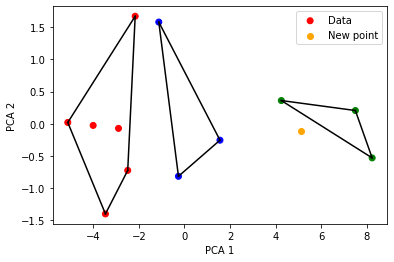

[ 2.12849389 -5.29695326  0.90221607]
[0. 0. 0.]
[-5.09955678 -6.58112636  7.44650785  3.81520157]
[0. 0. 0. 0. 0. 0.]
[ 0.26858954 -0.42533972 -1.91436082]
[0. 0. 0.]
{'SN II': 5.779463113639009, 'SN Ia': 11.803514130805315, 'SN Ibc': 1.9793512976951055}


In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull, distance

# Toy data with 3 distinct classes
X = np.array([[1, 1, 1, 1, 1], [0.0, 0.0, 0.0, 0.0, 0.0], [0.5, 0.5, 0.5, 0.5, 0.5], [1, 2, 0, 1, 0], [1, 2, 1, 1, 1], [1, 0.5, 3, 1, 1], [3, 1, 3, 1, 1], [2, 3, 2, 2, 2],
              [3, 3, 3, 3, 3], [4, 4, 5, 4, 4], [5, 5, 6, 5, 7], [6, 6, 6, 6, 6]])
y = np.array(["SN Ia", "SN Ia", "SN Ia", "SN Ia", "SN Ia", "SN Ia", "SN II", "SN II", "SN II", "SN Ibc", "SN Ibc", "SN Ibc"])

# PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Convex hulls for each class
hulls = {}
for label in np.unique(y):
    points = X_pca[y == label]
    hull = ConvexHull(points, qhull_options="QJ")
    hulls[label] = hull
    
    # plot convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# New object to be classified
new_obj = np.array([4, 4, 5, 6, 4])
new_obj_pca = pca.transform(new_obj.reshape(1, -1))

# Define color map for class labels
color_map = {'SN Ia': 'red', 'SN II': 'blue', 'SN Ibc': 'green'}
colors = [color_map[label] for label in y]
# Plot data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, label="Data")
plt.scatter(new_obj_pca[:, 0], new_obj_pca[:, 1], c="orange", label='New point')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Calculate distances to each class
distances = {}
for label, hull in hulls.items():
    points = X_pca[y == label]
    new_obj_pca = pca.transform(new_obj.reshape(1, -1))
    print((hull.equations[:, :-1].dot(new_obj_pca.T).flatten() + hull.equations[:, -1]).flatten())
    print(np.zeros((len(points),)))
    dist = distance.minkowski((hull.equations[:, :-1].dot(new_obj_pca.T).flatten() + hull.equations[:, -1]).flatten(),
                              np.zeros(len(hull.equations[:, -1]),), p=2)
    distances[label] = dist

# Concatenate distances from all classes into a single array
#all_distances = np.concatenate(list(distances.values()))
print(distances)




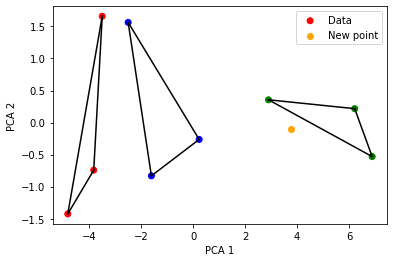

[ 2.09632339 -5.28861702  0.89653219]
[0. 0. 0.]
[-7.37311446  3.76631284  7.43740898]
[0. 0. 0.]
[ 0.26242119 -0.42588498 -2.03370642]
[0. 0. 0.]
{'SN II': 5.759150263004026, 'SN Ia': 11.129374719702314, 'SN Ibc': 2.094326792312417}


In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull, distance

# Toy data with 3 distinct classes
X = np.array([[1, 2, 0, 1, 0], [1, 2, 1, 1, 1], [1, 0.5, 3, 1, 1], [3, 1, 3, 1, 1], [2, 3, 2, 2, 2],
              [3, 3, 3, 3, 3], [4, 4, 5, 4, 4], [5, 5, 6, 5, 7], [6, 6, 6, 6, 6]])
y = np.array(["SN Ia", "SN Ia", "SN Ia", "SN II", "SN II", "SN II", "SN Ibc", "SN Ibc", "SN Ibc"])

# PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Convex hulls for each class
hulls = {}
for label in np.unique(y):
    points = X_pca[y == label]
    hull = ConvexHull(points, qhull_options="QJ")
    hulls[label] = hull
    
    # plot convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# New object to be classified
new_obj = np.array([4, 4, 5, 6, 4])
new_obj_pca = pca.transform(new_obj.reshape(1, -1))

# Define color map for class labels
color_map = {'SN Ia': 'red', 'SN II': 'blue', 'SN Ibc': 'green'}
colors = [color_map[label] for label in y]
# Plot data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, label="Data")
plt.scatter(new_obj_pca[:, 0], new_obj_pca[:, 1], c="orange", label='New point')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Calculate distances to each class
distances = {}
for label, hull in hulls.items():
    points = X_pca[y == label]
    new_obj_pca = pca.transform(new_obj.reshape(1, -1))
    print((hull.equations[:, :-1].dot(new_obj_pca.T).flatten() + hull.equations[:, -1]).flatten())
    print(np.zeros((len(points),)))
    dist = distance.minkowski((hull.equations[:, :-1].dot(new_obj_pca.T).flatten() + hull.equations[:, -1]).flatten(),
                              np.zeros((len(points),)), p=2)
    distances[label] = dist

# Concatenate distances from all classes into a single array
#all_distances = np.concatenate(list(distances.values()))
print(distances)


